In [1]:
import sys
sys.path.append('../')
from utils import plot_l23_prediction, load_exp_args, get_prediction,plot_l5_prediction,  config

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
exp_args = load_exp_args(checkpoint_dir="../checkpoints/gabor/shallow_mlp/fig3/args")
ckpt_dir_dict = {"exp_name": 'fig3', "suffix_args": ['seed','ablate_thal_l5','ablate_delay','ablate_topdown','ablate_l23_l5'], "sub_dir": ""}

In [3]:
exp_args

[Namespace(seed=1, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=True, ablate_topdown=False, ablate_l23_l5=False),
 Namespace(seed=5, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=False, ablate_topdown=False, ablate_l23_l5=False),
 Namespace(seed=4, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdow

args=[Namespace(seed=1, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=True, ablate_topdown=False, ablate_l23_l5=False), Namespace(seed=3, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=1500, batch_size=32, continue_training=False, sub_dir='', ablate_thal_l5=False, ablate_delay=True, ablate_topdown=False, ablate_l23_l5=False), Namespace(seed=5, input_dim=784, hidden_dim=128, latent_dim=16, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, l23_l5_fa=False, fa_sparsity=0.0, freeze_thal_l4=False, gabor_mode='variable', topd

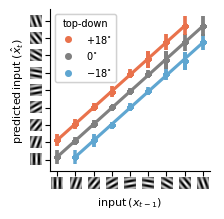

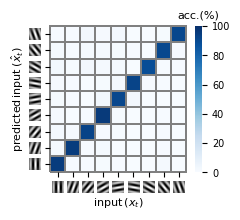

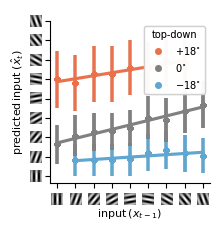

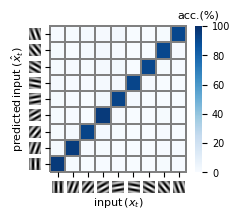

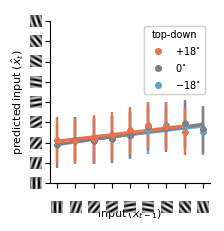

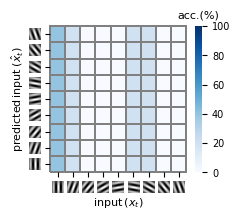

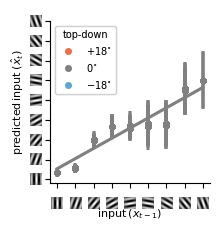

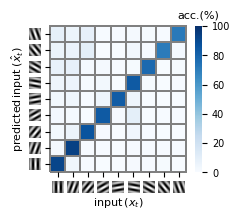

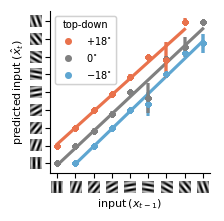

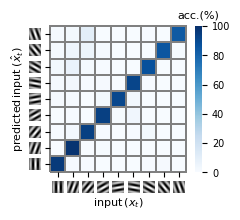

In [4]:
ablations = ['ablate_delay', 'ablate_l23_l5', 'ablate_thal_l5','ablate_topdown', 'full']

predictions_all = {}
for ablation in ablations:
    args = []
    if ablation == 'full':
        full_args = [arg for arg in exp_args if arg.ablate_delay == False and arg.ablate_l23_l5 == False and arg.ablate_thal_l5 == False and arg.ablate_topdown == False]
        args.extend(full_args)
    else:
        for arg in exp_args:
            if eval(f'arg.{ablation}') == True:
                args.append(arg)
    print(f"{args=}")
    if len(args) > 0:
        print(f'\n Ablation: {ablation}\n')
        predictions, l5_confusion_matrix = get_prediction(args, model_name='shallow_mlp', task_name='gabor',ckpt_dir_dict=ckpt_dir_dict)
        plot_l23_prediction(predictions, name=f'fig3_l23_prediction_{ablation}.svg', task="gabor", save_fig=False)
        plot_l5_prediction(l5_confusion_matrix*100, name=f'fig3_l5_prediction_{ablation}.svg',task="gabor", save_fig=False)
        predictions_all[ablation]= predictions
        

In [5]:
summary_results = {}
for ablation, predictions in predictions_all.items():
    data = predictions_all[ablation].copy()
    summary_results[ablation] = {'x1': {}, 'x2': {}}
    data['l23_acc_x2'] = data['preds_l23'] == data['x2']
    data['l23_acc_x1'] = data['preds_l23_x1'] == data['x1']

    data['l5_acc_x2'] = data['preds_l5'] == data['x2']
    data['l5_acc_x1'] = data['preds_l5_x1'] == data['x1']
    
    data = data[['seed', 'l23_acc_x1', 'l23_acc_x2', 'l5_acc_x1', 'l5_acc_x2']]

    l23_x1_mean = data.groupby('seed').agg(['mean'])['l23_acc_x1']['mean'].mean()
    l23_x1_std = data.groupby('seed').agg(['mean'])['l23_acc_x1']['mean'].std()
    
    l23_x2_mean = data.groupby('seed').agg(['mean'])['l23_acc_x2']['mean'].mean()
    l23_x2_std = data.groupby('seed').agg(['mean'])['l23_acc_x2']['mean'].std()
    
    l5_x1_mean = data.groupby('seed').agg(['mean'])['l5_acc_x1']['mean'].mean()
    l5_x1_std = data.groupby('seed').agg(['mean'])['l5_acc_x1']['mean'].std()
    
    l5_x2_mean = data.groupby('seed').agg(['mean'])['l5_acc_x2']['mean'].mean()
    l5_x2_std = data.groupby('seed').agg(['mean'])['l5_acc_x2']['mean'].std()
    
    summary_results[ablation]['x1']['l23_mean'] = round(l23_x1_mean* 100, 2) 
    summary_results[ablation]['x2']['l23_mean'] = round(l23_x2_mean* 100, 2)
    summary_results[ablation]['x1']['l5_mean'] = round(l5_x1_mean* 100,2)
    summary_results[ablation]['x2']['l5_mean'] = round(l5_x2_mean* 100, 2)
    
    summary_results[ablation]['x1']['l23_std'] = round(l23_x1_std* 100, 2)
    summary_results[ablation]['x2']['l23_std'] = round(l23_x2_std* 100, 2)
    summary_results[ablation]['x1']['l5_std'] = round(l5_x1_std* 100,2)
    summary_results[ablation]['x2']['l5_std'] = round(l5_x2_std* 100, 2)
    
    

In [6]:
summary_results

{'ablate_delay': {'x1': {'l23_mean': 41.64,
   'l5_mean': 40.39,
   'l23_std': 1.08,
   'l5_std': 1.71},
  'x2': {'l23_mean': 94.4, 'l5_mean': 93.23, 'l23_std': 1.48, 'l5_std': 2.13}},
 'ablate_l23_l5': {'x1': {'l23_mean': 23.55,
   'l5_mean': 40.32,
   'l23_std': 5.4,
   'l5_std': 1.79},
  'x2': {'l23_mean': 17.85,
   'l5_mean': 93.62,
   'l23_std': 5.33,
   'l5_std': 1.86}},
 'ablate_thal_l5': {'x1': {'l23_mean': 14.3,
   'l5_mean': 14.3,
   'l23_std': 2.61,
   'l5_std': 2.61},
  'x2': {'l23_mean': 14.28, 'l5_mean': 14.28, 'l23_std': 2.6, 'l5_std': 2.6}},
 'ablate_topdown': {'x1': {'l23_mean': 48.43,
   'l5_mean': 37.75,
   'l23_std': 25.87,
   'l5_std': 4.51},
  'x2': {'l23_mean': 28.81,
   'l5_mean': 85.49,
   'l23_std': 10.11,
   'l5_std': 7.0}},
 'full': {'x1': {'l23_mean': 88.09,
   'l5_mean': 38.96,
   'l23_std': 4.26,
   'l5_std': 2.59},
  'x2': {'l23_mean': 92.79,
   'l5_mean': 93.07,
   'l23_std': 6.89,
   'l5_std': 4.21}}}

/tmp/ipykernel_45257/815373015.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,50,100],fontsize=config.axis_fontsize)


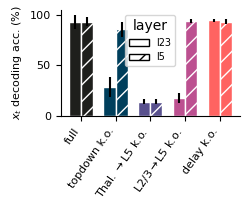

In [7]:
data =summary_results

# Define labels, means, and standard deviations for l23 and l5
labels = list(data.keys())
labels.reverse()
l23_means = [data[ablation]['x2']['l23_mean'] for ablation in labels]
l5_means = [data[ablation]['x2']['l5_mean'] for ablation in labels]
l23_stds = [data[ablation]['x2']['l23_std'] for ablation in labels]
l5_stds = [data[ablation]['x2']['l5_std'] for ablation in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Colors for each group
colors = ['#1e1f1c','#003f5c', '#58508d', '#bc5090', '#ff6361']

fig, ax = plt.subplots(figsize=(2.6, 2.2))
for i, label in enumerate(labels):
    ax.bar(x[i] - width/2, l23_means[i], width, yerr=l23_stds[i], label=f'L23 {label}', color=colors[i], edgecolor='white')
    ax.bar(x[i] + width/2, l5_means[i], width, yerr=l5_stds[i], label=f'L5 {label}', color=colors[i], hatch='//', edgecolor='white')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$x_{t}$ decoding acc. (%)', fontsize=config.axis_fontsize)
# ax.set_title('$x_2$ classification accuarcy',fontsize=config.title_fontsize) 
ax.set_xticks(x, fontsize=config.axis_fontsize)
ax.set_yticklabels([0,50,100],fontsize=config.axis_fontsize)

ax.set_xticklabels(['full', 'topdown k.o.', r'Thal. $\rightarrow$L5 k.o.', r'L2/3$\rightarrow$L5 k.o.', 'delay k.o.'], rotation=55, ha="right", fontsize=config.axis_fontsize)
# ax.hlines((1/9)*100 ,0, len(x), linestyles='dashed', color='gray')
sns.despine()
# add custom legend
l23_patch = mpatches.Patch(facecolor='white', label='l23', edgecolor='black')
l5_patch = mpatches.Patch(facecolor='white', hatch="//", label='l5', edgecolor='black')
ax.legend(handles=[l23_patch, l5_patch], title="layer", fontsize=config.legend_fontsize)


fig.tight_layout()

save_fig = True
if save_fig:
    plt.savefig(f'saved_figs/fig3_ablation_summary_x2.svg', dpi=300)
else:
    print('not saving fig')

/tmp/ipykernel_45257/701742334.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,50,100],fontsize=config.axis_fontsize)


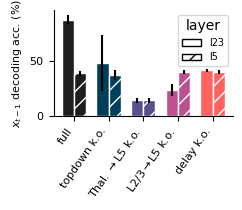

In [14]:

data =summary_results

# Define labels, means, and standard deviations for l23 and l5
labels = list(data.keys())
labels.reverse()
l23_means = [data[ablation]['x1']['l23_mean'] for ablation in labels]
l5_means = [data[ablation]['x1']['l5_mean'] for ablation in labels]
l23_stds = [data[ablation]['x1']['l23_std'] for ablation in labels]
l5_stds = [data[ablation]['x1']['l5_std'] for ablation in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Colors for each group
colors = ['#1e1f1c','#003f5c', '#58508d', '#bc5090', '#ff6361']

fig, ax = plt.subplots(figsize=(2.6, 2.2))
for i, label in enumerate(labels):
    ax.bar(x[i] - width/2, l23_means[i], width, yerr=l23_stds[i], label=f'L23 {label}', color=colors[i], edgecolor='white')
    ax.bar(x[i] + width/2, l5_means[i], width, yerr=l5_stds[i], label=f'L5 {label}', color=colors[i], hatch='//', edgecolor='white')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$x_{t-1}$ decoding acc. (%)', fontsize=config.axis_fontsize)
# ax.set_title('$x_1$ classification accuarcy',fontsize=config.title_fontsize) 
ax.set_xticks(x, fontsize=config.axis_fontsize)
ax.set_yticklabels([0,50,100],fontsize=config.axis_fontsize)

ax.set_xticklabels(['full', 'topdown k.o.', r'Thal. $\rightarrow$L5 k.o.', r'L2/3$\rightarrow$L5 k.o.', 'delay k.o.'], rotation=55, ha="right", fontsize=config.axis_fontsize)

sns.despine()
# add custom legend
l23_patch = mpatches.Patch(facecolor='white', label='l23', edgecolor='black')
l5_patch = mpatches.Patch(facecolor='white', hatch="//", label='l5', edgecolor='black')
ax.legend(handles=[l23_patch, l5_patch], title="layer", fontsize=config.legend_fontsize)


fig.tight_layout()

save_fig = True
if save_fig:
    plt.savefig(f'saved_figs/fig3_ablation_summary_x1.svg', dpi=300)
else:
    print('not saving fig')

## deterministic

In [ ]:
exp_args = load_exp_args(checkpoint_dir="../checkpoints/gabor/shallow_mlp/fig3/deterministic/args")
ckpt_dir_dict = {"exp_name": 'fig3', "suffix_args": ['seed','ablate_thal_l5','ablate_delay','ablate_topdown','ablate_l23_l5'], "sub_dir": "deterministic"}

In [ ]:
ablations = ['ablate_topdown']
for ablation in ablations:
    args = []
    for arg in exp_args:
        if eval(f'arg.{ablation}') == True:
            args.append(arg)
    
    if len(args) > 0:
        print(f'\n Ablation: {ablation}\n')
        predictions, l5_confusion_matrix = get_prediction(args, model_name='shallow_mlp', task_name='gabor',ckpt_dir_dict=ckpt_dir_dict)
        plot_l23_prediction(predictions, name=f'fig3_l23_prediction_{ablation}_deterministic.svg', task="gabor", save_fig=False)
        plot_l5_prediction(l5_confusion_matrix*100, name=f'fig3_l5_prediction_{ablation}_deterministic.svg', task="gabor", save_fig=False)

In [ ]:
data = predictions.copy()
data['mean_l23'] = data.groupby(['x1', 'x2', 'cue'])['preds_l23'].transform('mean')
data['std_l23'] = data.groupby(['x1', 'x2', 'cue'])['preds_l23'].transform('std')

plt.figure(figsize=(2, 2))
plt.errorbar(data['x1'], data['mean_l23'], yerr=data['std_l23'], fmt='.', color='gray', alpha=0.5, label='no cue')
plt.xlabel('$\mathrm{input}\: (x_t)$', fontsize=config.axis_fontsize)
plt.ylabel('$\mathrm{predicted\, input}\:(\hat{x}_t)$', fontsize=config.axis_fontsize)

# Set the x and y axis labels
plt.xticks(range(0, 9), fontsize=config.tick_fontsize)
plt.yticks(range(0, 9), fontsize=config.tick_fontsize)

plt.grid(False)
# remove top and right spines
sns.despine()
plt.legend(fontsize=config.legend_fontsize)


save_fig = False
if save_fig:
    plt.savefig(f'saved_figs/fig3_l23_prediction_{ablation}_deterministic.svg', dpi=300)
else:
    print('not saving fig')